# Настройка pandas

In [39]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые 
# настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [41]:
pd.__version__

'1.3.4'

# Объект Series

In [42]:
# создаем объект Series, состоящий
# из четырех элементов
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [46]:
s[[1,0,2]]

1    2
0    1
2    3
dtype: int64

In [3]:
# получаем значение для метки индекса 1
s[1]

2

In [4]:
# возвращаем серию с элементами,
# у которых метки 1 и 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [52]:
# создаем серию, задав индекс в явном виде
s = pd.Series([1, 2, 3, 4], 
               index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [48]:
dicts ={a: a**0.45 for a in range(10)}

{0: 0.0,
 1: 1.0,
 2: 1.3660402567543954,
 3: 1.639474116758873,
 4: 1.8660659830736148,
 5: 2.063177067680795,
 6: 2.2395876433994766,
 7: 2.4004580350323375,
 8: 2.5491212546385245,
 9: 2.6878753795222865}

In [50]:
s = pd.Series(dicts)

In [53]:
s

a    1
b    2
c    3
d    4
dtype: int64

In [56]:
# ищем элементы серии, у которых
# метки индекса 'a' и 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [59]:
# передаем список целочисленных значений в объект Series,
# у которого метки индекса записаны в виде букв,
# поиск буквенных меток будет осуществлен на основе
# числового индекса, начинающегося с 0,
# как если бы мы использовали обычный массив
s[[1, 3]]

b    2
d    4
dtype: int64

In [60]:
# извлекаем только индекс объекта Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [65]:
# создаем объект Series, индекс которого - серия дат
# между двумя определенными датами (включительно)
dates = pd.date_range('2019-04-01', '2019-04-06')
dates

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06'],
              dtype='datetime64[ns]', freq='D')

In [66]:
# создаем объект Series, в котором значениям температуры
# будут соответствовать даты в индексе
temps1 = pd.Series([20, 27, 25, 24, 24, 27], 
                   index = dates)
temps1

2019-04-01    20
2019-04-02    27
2019-04-03    25
2019-04-04    24
2019-04-05    24
2019-04-06    27
Freq: D, dtype: int64

In [71]:
# какая температура была 2019-04-04?
temps1['2019-04-05']

24

In [72]:
dates = pd.date_range('2019-04-01', '2019-04-07')
dates

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07'],
              dtype='datetime64[ns]', freq='D')

In [73]:
# создаем вторую серию значений, используя
# тот же самый индекс
temps2 = pd.Series([20, 25, 19, 23, 22, 26, 45], 
                   index = dates)
# следующий программный код выравнивает
# обе серии по меткам индекса и вычисляет
# разницу температур в этих метках
temp_diffs = temps1 - temps2
temp_diffs

2019-04-01    0.0
2019-04-02    2.0
2019-04-03    6.0
2019-04-04    1.0
2019-04-05    2.0
2019-04-06    1.0
2019-04-07    NaN
Freq: D, dtype: float64

In [74]:
# вычислим разницу температур для определенной числовой 
# метки индекса, как если бы серия была массивом
temp_diffs[2]

6.0

In [75]:
# вычисляем среднее значение разности температур
temp_diffs.mean()

2.0

# Объект DataFrame

In [76]:
# создаем объект DataFrame с двумя сериями temp1 и temp2
# и присваиваем им имена столбцов
temps_df = pd.DataFrame(
            {'Minsk': temps1, 
             'Vitebsk': temps2})
temps_df

            Minsk  Vitebsk
2019-04-01   20.0       20
2019-04-02   27.0       25
2019-04-03   25.0       19
2019-04-04   24.0       23
2019-04-05   24.0       22
2019-04-06   27.0       26
2019-04-07    NaN       45

In [77]:
# получаем столбец Minsk
temps_df['Minsk']

2019-04-01    20.0
2019-04-02    27.0
2019-04-03    25.0
2019-04-04    24.0
2019-04-05    24.0
2019-04-06    27.0
2019-04-07     NaN
Freq: D, Name: Minsk, dtype: float64

In [78]:
# аналогичным образом мы можем получить
# столбец Vitebsk
temps_df['Vitebsk']

2019-04-01    20
2019-04-02    25
2019-04-03    19
2019-04-04    23
2019-04-05    22
2019-04-06    26
2019-04-07    45
Freq: D, Name: Vitebsk, dtype: int64

In [79]:
# выводим оба столбца
temps_df[['Vitebsk', 'Minsk']]

            Vitebsk  Minsk
2019-04-01       20   20.0
2019-04-02       25   27.0
2019-04-03       19   25.0
2019-04-04       23   24.0
2019-04-05       22   24.0
2019-04-06       26   27.0
2019-04-07       45    NaN

In [80]:
# извлекаем столбец Minsk с помощью 
# "вычисляемого" свойства
temps_df.Minsk

2019-04-01    20.0
2019-04-02    27.0
2019-04-03    25.0
2019-04-04    24.0
2019-04-05    24.0
2019-04-06    27.0
2019-04-07     NaN
Freq: D, Name: Minsk, dtype: float64

In [82]:
# вычисляем разницу температур двух городов
temps_df.Vitebsk - temps_df.Minsk

2019-04-01    0.0
2019-04-02   -2.0
2019-04-03   -6.0
2019-04-04   -1.0
2019-04-05   -2.0
2019-04-06   -1.0
2019-04-07    NaN
Freq: D, dtype: float64

In [95]:
# добавляем в датафрейм temp_df столбец Difference,
# который содержит разности температур
temps_df['Difference'] = temp_diffs
temps_df

            Minsk  Vitebsk  Difference  TEST
2019-04-01   20.0       20         0.0   0.0
2019-04-02   27.0       25         2.0   2.0
2019-04-03   25.0       19         6.0   6.0
2019-04-04   24.0       23         1.0   1.0
2019-04-05   24.0       22         2.0   2.0
2019-04-06   27.0       26         1.0   1.0
2019-04-07    NaN       45         NaN   NaN

In [98]:
temps_df['TEST']=temp_diffs**0.5

In [101]:
temps_df

            Minsk  Vitebsk  Difference      TEST
2019-04-01   20.0       20         0.0  0.000000
2019-04-02   27.0       25         2.0  1.414214
2019-04-03   25.0       19         6.0  2.449490
2019-04-04   24.0       23         1.0  1.000000
2019-04-05   24.0       22         2.0  1.414214
2019-04-06   27.0       26         1.0  1.000000
2019-04-07    NaN       45         NaN       NaN

In [112]:
temps_df.iloc[[1, 3, 5]]

            Minsk  Vitebsk  Difference      TEST
2019-04-02   27.0       25         2.0  1.414214
2019-04-04   24.0       23         1.0  1.000000
2019-04-06   27.0       26         1.0  1.000000

In [109]:
temps_df.loc['2019-04-01':'2019-04-06']

            Minsk  Vitebsk  Difference      TEST
2019-04-01   20.0       20         0.0  0.000000
2019-04-02   27.0       25         2.0  1.414214
2019-04-03   25.0       19         6.0  2.449490
2019-04-04   24.0       23         1.0  1.000000
2019-04-05   24.0       22         2.0  1.414214
2019-04-06   27.0       26         1.0  1.000000

In [89]:
# получаем имена столбцов, которые
# к тому же являются объектом Index
temps_df.columns


Index(['Minsk', 'Vitebsk', 'Difference', 'TEST'], dtype='object')

In [93]:
# отбираем значения разностей температур в столбце Difference, начиная 
# с позиции 1 (2019-04-02) и заканчивая позицией 4 (2019-04-05), 
# как если бы это был массив
# обратите внимание, что конец диапазона не включается, то есть
# диапазон не включает элемент с позицией 4 (2019-04-05)
temps_df.Difference[1:4]

2019-04-02    2.0
2019-04-03    6.0
2019-04-04    1.0
Freq: D, Name: Difference, dtype: float64

In [24]:
# получаем строку, которой соответствует
# метка индекса 1
temps_df.iloc[1]

Minsk         27
Vitebsk       25
Difference     2
Name: 2019-04-02 00:00:00, dtype: int64

In [110]:
# имена столбцов стали индексом,
# мы "повернули" их
temps_df.iloc[1].index

Index(['Minsk', 'Vitebsk', 'Difference', 'TEST'], dtype='object')

In [111]:
# извлекаем строку с помощью метки индекса,
# воспользовавшись свойством .loc
temps_df.loc['2019-04-05']

Minsk         24.000000
Vitebsk       22.000000
Difference     2.000000
TEST           1.414214
Name: 2019-04-05 00:00:00, dtype: float64

In [113]:
# получаем значения столбца Difference в строках 1, 3 и 5,
# используя целочисленные позиции с началом отсчета в 0
temps_df.iloc[[1, 3, 5]].Difference

2019-04-02    2.0
2019-04-04    1.0
2019-04-06    1.0
Freq: 2D, Name: Difference, dtype: float64

In [114]:
# какие значения в столбце Minsk > 24?
temps_df.Minsk > 24

2019-04-01    False
2019-04-02     True
2019-04-03     True
2019-04-04    False
2019-04-05    False
2019-04-06     True
2019-04-07    False
Freq: D, Name: Minsk, dtype: bool

In [115]:
# возвращаем строки, в которых значения температуры 
# для столбца Minsk > 24
temps_df[temps_df.Minsk > 24]

            Minsk  Vitebsk  Difference      TEST
2019-04-02   27.0       25         2.0  1.414214
2019-04-03   25.0       19         6.0  2.449490
2019-04-06   27.0       26         1.0  1.000000

# Загрузка данных из CSV-файла в объект DataFrame

In [182]:
# считываем содержимое файла в объект DataFrame
df = pd.read_csv('sp500.csv')
df.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Dividend Yield', 'Price/Earnings',
       'Earnings/Share', 'Book Value', '52 week low', '52 week high',
       'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [189]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          500 non-null    object 
 1   Name            500 non-null    object 
 2   Sector          500 non-null    object 
 3   Price           500 non-null    float64
 4   Dividend Yield  424 non-null    float64
 5   Price/Earnings  480 non-null    float64
 6   Earnings/Share  499 non-null    float64
 7   Book Value      499 non-null    float64
 8   52 week low     499 non-null    float64
 9   52 week high    499 non-null    float64
 10  Market Cap      496 non-null    float64
 11  EBITDA          499 non-null    float64
 12  Price/Sales     496 non-null    float64
 13  Price/Book      486 non-null    float64
 14  SEC Filings     500 non-null    object 
dtypes: float64(11), object(4)
memory usage: 58.7+ KB


In [187]:
df.describe().T

                count        mean          std      min       25%      50%  \
Price           500.0   77.368600    87.596940   0.0000  38.74500  58.3550   
Dividend Yield  424.0    2.131439     1.321017   0.0400   1.26000   1.8900   
Price/Earnings  480.0   29.887792    70.163577   2.5200  15.57000  20.0050   
Earnings/Share  499.0    3.564842     4.049497 -10.6930   1.65200   2.8410   
Book Value      499.0  301.611301  6195.727862 -51.2750  10.83650  19.0980   
...               ...         ...          ...      ...       ...      ...   
52 week high    499.0   84.668283    98.995689   6.1000  42.50000  63.5600   
Market Cap      496.0   35.348525    54.839169   0.2085   9.85925  17.4445   
EBITDA          499.0    3.700364     6.669021  -0.3313   0.86780   1.6360   
Price/Sales     496.0    2.782359     2.529481   0.0000   1.22000   2.0050   
Price/Book      486.0    4.620514    10.578663   0.0000   1.80250   3.1250   

                     75%          max  
Price           86.6800

In [159]:
cd C:\Users\andru\python_progect\Курсы по питону для преподования\Курсы по DS\уроки\Урок 4

C:\Users\andru\python_progect\Курсы по питону для преподования\Курсы по DS\уроки\Урок 4


In [157]:
cd C:\

C:\


In [161]:
df = pd.read_csv('../../goog_2.csv')
df

          Date        Open        High         Low       Close   Volume
0   12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1   12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2   12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3   12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4   12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
..         ...         ...         ...         ...         ...      ...
56   3/13/2017  844.000000  848.684998  843.250000  845.539978  1149500
57   3/14/2017  843.640015  847.239990  840.799988  845.619995   779900
58   3/15/2017  847.590027  848.630005  840.770020  847.200012  1379600
59   3/16/2017  849.030029  850.849976  846.130005  848.780029   970400
60   3/17/2017  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [141]:
ls

 Том в устройстве C не имеет метки.
 Серийный номер тома: 5A34-2B65

 Содержимое папки C:\Users\andru\python_progect\Курсы по питону для преподования\Курсы по DS\уроки\Урок 4

19.09.2022  20:42    <DIR>          .
19.09.2022  20:42    <DIR>          ..
19.09.2022  17:50    <DIR>          .ipynb_checkpoints
19.09.2022  20:42           102 080 2.2_Запуск библиотеки pandas.ipynb
19.09.2022  17:48         9 767 254 4. Data Science.pptx
19.09.2022  12:56            18 795 class.ipynb
22.06.2022  08:24             3 580 classes_.ipynb
19.09.2022  19:40    <DIR>          DEMO_DZ
19.09.2022  17:39    <DIR>          face
22.06.2022  06:31             2 262 globals _.ipynb
09.03.2022  16:38             3 602 goog.csv
19.09.2022  17:59             3 694 googl.csv
19.09.2022  18:00             3 089 googl_1.csv
22.06.2022  06:06             7 994 map_filter_lambda_cache.ipynb
15.09.2022  05:52            88 935 numpy tutorial.ipynb
19.09.2022  07:01             5 043 SET (множества).ipynb
19.09.20

In [164]:
df.to_csv('goog.csv',sep='.',index=False)

In [36]:
df.to_csv('googl_1.csv',sep=',',index=False)

In [120]:
df = pd.read_csv('googl.csv',sep=';',index_col=['Date'])

In [127]:
df.iloc[0:25]

                  Open        High         Low       Close   Volume
Date                                                               
12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
1/19/2017   805.119995  809.479980  801.799988  802.174988   912000
1/20/2017   806.909973  806.909973  801.690002  805.020020  1645000
1/23/2017   807.250000  820.869995  803.739990  819.309998  1901600
1/24/2017   822.299988  825.900024  817.820984  823.869995  1461000
1/25/2017   829.619995  835.770020  825.059998  835.669983  1494500

[25 rows x 5 columns]

In [131]:
# выводим содержимое столбца с датами
df.Date

0     12/19/2016
1     12/20/2016
2     12/21/2016
3     12/22/2016
4     12/23/2016
         ...    
56     3/13/2017
57     3/14/2017
58     3/15/2017
59     3/16/2017
60     3/17/2017
Name: Date, Length: 61, dtype: object

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [33]:
# мы можем получить первое значение
# в столбце с датами
df.Date[0]

'12/19/2016'

In [134]:
# оно является строкой
type(df.Date[0])

str

In [135]:
# считываем данные и указываем библиотеке pandas, 
# что в итоговом датафрейме значения столбца
# с датами должны быть фактическими датами
df = pd.read_csv('goog.csv', parse_dates=['Date'])
df

         Date        Open        High         Low       Close   Volume
0  2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
1  2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2  2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
3  2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
4  2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
..        ...         ...         ...         ...         ...      ...
56 2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
57 2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
58 2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
59 2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
60 2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [136]:
# проверяем, являются ли сейчас значения столбца
# Date датами, то есть фактически им присвоен
# тип Timestamp
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [137]:
# к сожалению, индекс использует числовые значения,
# что затрудняет вывод данных по дате
df.index

RangeIndex(start=0, stop=61, step=1)

In [138]:
# считываем данные снова, теперь задаем столбец с датами 
# в качестве индекса датафрейма
df = pd.read_csv('goog.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')
df

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 5 columns]

In [139]:
# и теперь индекс - это DatetimeIndex
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
      

# Визуализация

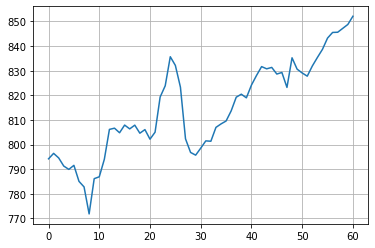

In [171]:
# на основе значений столбца Close строим график
df.Close.plot()
plt.grid();

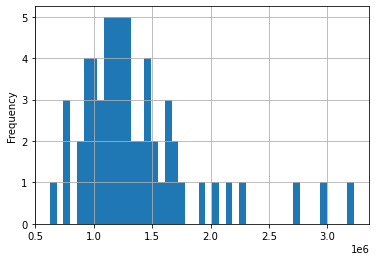

In [172]:
df.Volume.plot.hist(bins=45)
plt.grid();

C:\Users\biaspaltsau_aa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


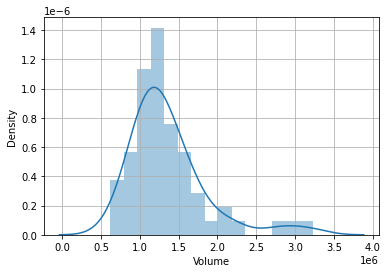

In [42]:
sns_plot = sns.distplot(df['Volume'], bins=15)
fig = sns_plot.get_figure()
plt.grid();

In [43]:
df.Volume.mean()

1361268.8524590165

In [174]:
data = pd.read_csv('goog.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')
data['Diff'] = data['High'] - data['Low']
data['Mean'] = data['Diff'].mean()
data['var'] = data['Diff'].var()
data['std'] = data['Diff'].std()
d2017 = data[['std', 'High', 'Low', 'Diff']]
d2017_2 = d2017['2017-01-01':'2017-12-31']
print(d2017_2)

                 std        High         Low       Diff
Date                                                   
2017-01-03  3.427367  789.630005  775.799988  13.830017
2017-01-04  3.427367  791.340027  783.159973   8.180054
2017-01-05  3.427367  794.479980  785.020020   9.459960
2017-01-06  3.427367  807.900024  792.203979  15.696045
2017-01-09  3.427367  809.966003  802.830017   7.135986
...              ...         ...         ...        ...
2017-03-13  3.427367  848.684998  843.250000   5.434998
2017-03-14  3.427367  847.239990  840.799988   6.440002
2017-03-15  3.427367  848.630005  840.770020   7.859985
2017-03-16  3.427367  850.849976  846.130005   4.719971
2017-03-17  3.427367  853.400024  847.109985   6.290039

[52 rows x 4 columns]


In [175]:
data[['Diff','Mean','var','std']]

                 Diff     Mean        var       std
Date                                               
2016-12-19  11.389953  8.02151  11.746845  3.427367
2016-12-20   5.380004  8.02151  11.746845  3.427367
2016-12-21   9.576049  8.02151  11.746845  3.427367
2016-12-22   4.739990  8.02151  11.746845  3.427367
2016-12-23   5.459961  8.02151  11.746845  3.427367
...               ...      ...        ...       ...
2017-03-13   5.434998  8.02151  11.746845  3.427367
2017-03-14   6.440002  8.02151  11.746845  3.427367
2017-03-15   7.859985  8.02151  11.746845  3.427367
2017-03-16   4.719971  8.02151  11.746845  3.427367
2017-03-17   6.290039  8.02151  11.746845  3.427367

[61 rows x 4 columns]

---

In [176]:
!pip install pandas-profiling --user

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=43b62e853438a70ec936558af2f4b62b17ed66706d8ea720f3a54713ff507a5c
  Stored in directory: c:\users\andru\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [190]:
import pandas_profiling as pp
report_train = pp.ProfileReport(df)
report_train.to_file('profile_report_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [193]:
g = {f:f**2 for f in range(10)}

---

In [195]:
g.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [198]:
g.pop(0)

0

In [200]:
g.pop(9)

81

In [202]:
g.clear()

In [203]:
g

{}

In [208]:
g.

{}